In [1]:
import pandas as pd
import numpy as np

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
row_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([row_df.values[::2, :], row_df.values[1::2, :2]])
target = row_df.values[1::2, 2]

In [3]:
x = pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])

y = pd.DataFrame(target, columns=["PRICE"])

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [9]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
y

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [19]:
model = DecisionTreeRegressor(max_depth=4)

In [20]:
model.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [23]:
predict = model.predict(x_test)

In [24]:
from sklearn.metrics import r2_score

In [25]:
print(model.score(x_test, y_test))
print(r2_score(y_test, predict))

0.8646893116543823
0.8646893116543823


In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

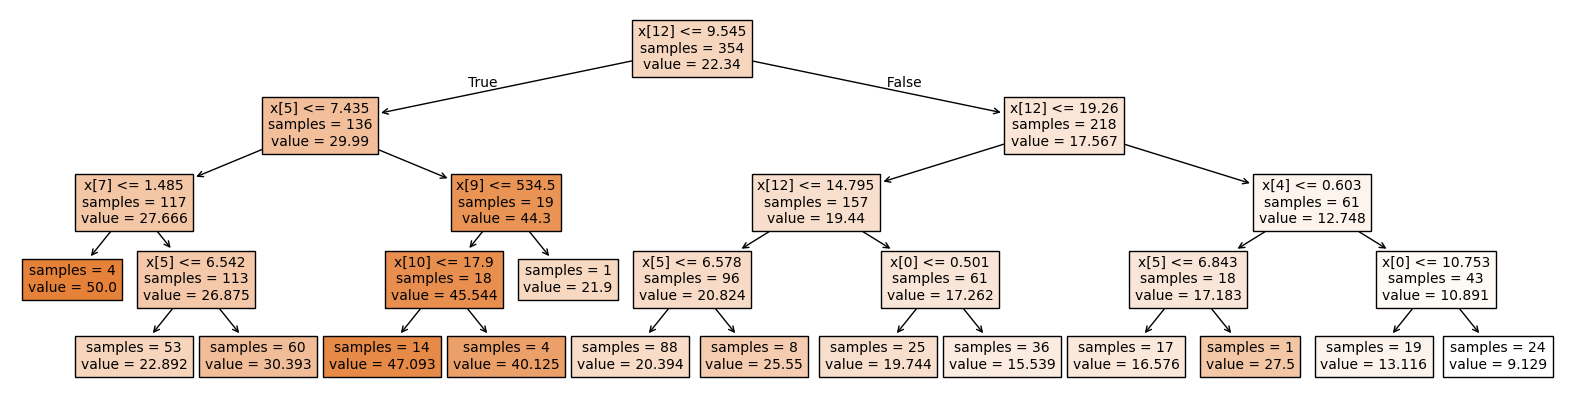

In [27]:
plt.figure(figsize=(20, 5))
plot_tree(model, impurity=False, filled=True, fontsize=10)
plt.show()